# BIOINF 305. Assignment - week 34.

## Assem Maratova

#### Assignment statement

Write and test a python notebook to perform the following simulations.

**Simple gene regulation**

- Calculate the dynamics of single gene regulation for a gene $Y$ with production rate $\beta$ and degradation rate $\alpha$.

- Plot the temporal profile  $Y\left(t\right)$ as a function of time $t$, starting with initial  concentration  $Y\left(0\right)=0$.

- The response time is the time it takes for $Y$ to reach halfway to its steady state value. Write code to find the response time for given production and degradation rate.

- Vary the production and degradation rates in such a way that the steady state value remains constant. How do the temporal profiles change? How do the response times change?

**Regulatory cascade**

Implement Alon's exercises 2.4 and 2.6: assume a regulatory cascade  $X -> Y -> Z$ with $X$ activated at time 0 with pulse of duration $D$, and production of $Z$ starting once $Y$ exceeds $K_y$; assume logic input functions with different production and degradation rates for $Y$ and $Z$. Plot the temporal profiles of $Y$ and $Z$.

## Simple gene regulation

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting some parameters for plots
plt.style.use('seaborn')
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 
plt.rcParams['figure.figsize'] = 10 , 6 # default figure size

The equations that we need are: $$\frac{dY}{dt} = \beta - \alpha \cdot Y, \qquad Y(t)=\frac{\beta}{\alpha}\cdot e^{(-\alpha\cdot t)}, \qquad Y_{ST}= \frac{\beta}{\alpha}, \qquad T_{1/2}= \frac{log(2)}{\alpha}. $$

In [3]:
# function that returns dy/dt
def concentraion_rate(y,t,beta,alpha):
    dydt = beta - alpha*y
    return dydt

In [4]:
# initial condition
y0 = 0

# time points
t = np.linspace(0,10)

The following code plots $Y(t)$ as a function of $t$ for different values of $\beta$ and $\alpha$. $Y(t)$ is represented by an ODE.

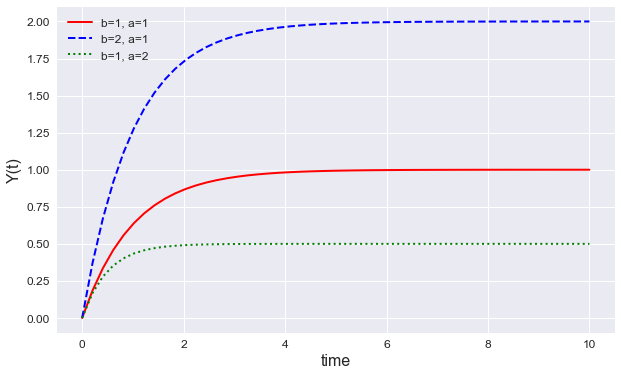

In [5]:
# solve ODEs
b, a = 1, 1
y1 = odeint(concentraion_rate,y0,t,args=(b,a))
b, a = 2, 1
y2 = odeint(concentraion_rate,y0,t,args=(b,a))
b, a = 1, 2
y3 = odeint(concentraion_rate,y0,t,args=(b,a))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='b=1, a=1')
plt.plot(t,y2,'b--',linewidth=2,label='b=2, a=1')
plt.plot(t,y3,'g:',linewidth=2,label='b=1, a=2')
plt.xlabel('time')
plt.ylabel('Y(t)')
plt.legend()
plt.show()

If the ODE for concentration rate is solved, then we have an explicit expression for $Y(t)$.

In [6]:
# function that computes Y
def Y(t, beta, alpha):
    return beta/alpha*(1.0- np.exp(-alpha*t))

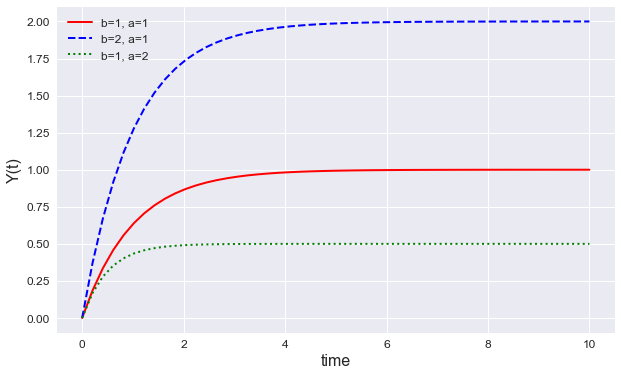

In [7]:
# plot results
plt.plot(t,Y(t, 1, 1),'r-',linewidth=2,label='b=1, a=1')
plt.plot(t,Y(t, 2, 1),'b--',linewidth=2,label='b=2, a=1')
plt.plot(t,Y(t, 1, 2),'g:',linewidth=2,label='b=1, a=2')
plt.xlabel('time')
plt.ylabel('Y(t)')
plt.legend()
plt.show()

**Note:** both methods for computing $Y(t)$ give same results.

Steady state will be constant if the retion between $\beta$ and $\alpha$ remains the same.

In [8]:
# the response time 
def T(alpha):
    return np.log(2)/alpha

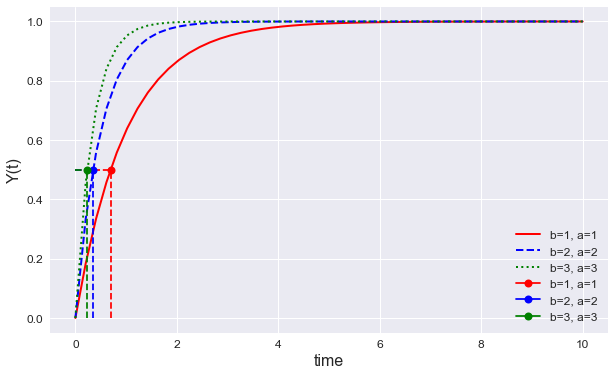

In [9]:
# plot results
plt.plot(t,Y(t, 1, 1),'r-',linewidth=2,label='b=1, a=1')
plt.plot(t,Y(t, 2, 2),'b--',linewidth=2,label='b=2, a=2')
plt.plot(t,Y(t, 3, 3),'g:',linewidth=2,label='b=3, a=3')
plt.plot(T(1), 0.5, 'or-', markersize=8,label='b=1, a=1')
plt.plot([0, T(1)], [0.5,0.5], 'r--')
plt.plot([T(1), T(1)], [0,0.5], 'r--')
plt.plot(T(2), 0.5, 'ob-', markersize=8,label='b=2, a=2')
plt.plot([0, T(2)], [0.5,0.5], 'b--')
plt.plot([T(2), T(2)], [0,0.5], 'b--')
plt.plot(T(3), 0.5, 'og-', markersize=8,label='b=3, a=3')
plt.plot([0, T(3)], [0.5,0.5], 'g--')
plt.plot([T(3), T(3)], [0,0.5], 'g--')
plt.xlabel('time')
plt.ylabel('Y(t)')
plt.legend()
plt.show()

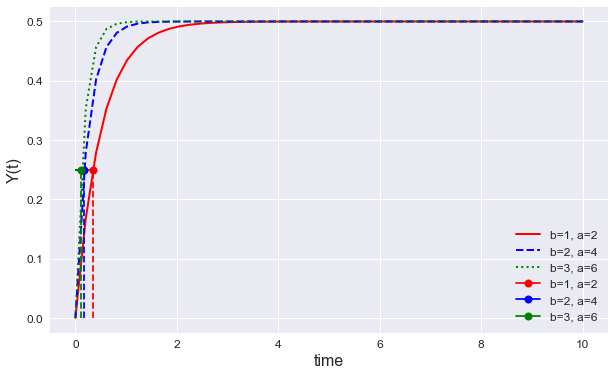

In [10]:
# plot results
plt.plot(t,Y(t, 1, 2),'r-',linewidth=2,label='b=1, a=2')
plt.plot(t,Y(t, 2, 4),'b--',linewidth=2,label='b=2, a=4')
plt.plot(t,Y(t, 3, 6),'g:',linewidth=2,label='b=3, a=6')
plt.plot(T(2), 0.25, 'or-', markersize=8,label='b=1, a=2')
plt.plot([0, T(2)], [0.25,0.25], 'r--')
plt.plot([T(2), T(2)], [0,0.25], 'r--')
plt.plot(T(4), 0.25, 'ob-', markersize=8,label='b=2, a=4')
plt.plot([0, T(4)], [0.25,0.25], 'b--')
plt.plot([T(4), T(4)], [0,0.25], 'b--')
plt.plot(T(6), 0.25, 'og-', markersize=8,label='b=3, a=6')
plt.plot([0, T(6)], [0.25,0.25], 'g--')
plt.plot([T(6), T(6)], [0,0.25], 'g--')

plt.xlabel('time')
plt.ylabel('Y(t)')
plt.legend()
plt.show()

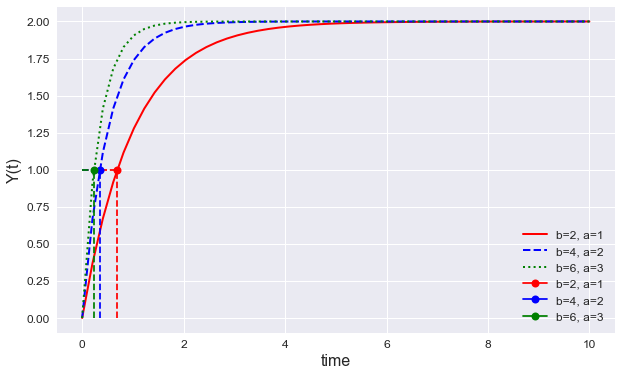

In [11]:
# plot results

plt.plot(t,Y(t, 2, 1),'r-',linewidth=2,label='b=2, a=1')
plt.plot(t,Y(t, 4, 2),'b--',linewidth=2,label='b=4, a=2')
plt.plot(t,Y(t, 6, 3),'g:',linewidth=2,label='b=6, a=3')
plt.plot(T(1), 1, 'or-', markersize=8,label='b=2, a=1')
plt.plot([0, T(1)], [1,1], 'r--')
plt.plot([T(1), T(1)], [0,1], 'r--')
plt.plot(T(2), 1, 'ob-', markersize=8,label='b=4, a=2')
plt.plot([0, T(2)], [1,1], 'b--')
plt.plot([T(2), T(2)], [0,1], 'b--')
plt.plot(T(3), 1, 'og-', markersize=8,label='b=6, a=3')
plt.plot([0, T(3)], [1,1], 'g--')
plt.plot([T(3), T(3)], [0,1], 'g--')

plt.xlabel('time')
plt.ylabel('Y(t)')
plt.legend()
plt.show()